This jupyter notebook analyzes and interprets data from hundreds of court cases from google scholar.

In [2]:
# IMPORTS
from pathlib import Path
import re
import os
import nltk
import seaborn as sns
nltk.download('wordnet')
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

from nltk.corpus import stopwords
stoplist = stopwords.words('english')

# MPL block
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300
plt.rcParams["figure.figsize"] = (10,5)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Jakob\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
# Here we get the data from our court cases. A lot of work is needed to make sure this is clean.


plays = []
for FileName in os.listdir("Output"):
    FilePath = os.path.join("Output", FileName)
    if os.path.isfile(FilePath):
        with open(FilePath, 'r', encoding='utf-8') as file:
            FileText = file.read()
            # Replace dashes and periods with spaces, keeping sequences of 4+ digits
            IntermediateText = re.sub(r'[-.]', ' ', FileText.lower())
            # Keep letters, spaces, and numbers of 4+ digits, replace other characters with a space
            CleanText = re.sub(r'(?<!\d)\d{1,3}(?!\d)|[^\w\s]', '', IntermediateText)
            CleanText = re.sub(r'\b\d{1,3}\b', ' ', CleanText)  # Remove numbers less than 4 digits
            plays.append(CleanText)

In [4]:
# A single massive string of cleaned court cases.
text = " ".join(plays)

tokens = nltk.tokenize.word_tokenize(text)

# Let's convert that to tokens so we can work with it
AllTokens = nltk.Text(tokens)

In [5]:
# Where does this word show up in the data? In what context?
AllTokens.concordance("sue")

Displaying 20 of 20 matches:
 an overseas plane crash permitted to sue responsible belizean corporate defend
retires to florida would be unable to sue gm in that state for disabilities tha
the same time he would not be able to sue if it failed to live up to its respon
though he would presumably be able to sue citistaff the evidence shows that tes
 waiver of the patent owners right to sue the parties agree that the patent own
arty the licensorpatent owner can not sue the third party for infringement see 
nsee the licensorpatent owner can not sue the unlicensed party for patent infri
department of justice issued right to sue letters to each plaintiff against def
such practice and obtained a right to sue letter u s c 2000e e and f see fitzge
 wrongful conduct a plaintiff may not sue the defendant on one theory and havin
ey general in nash was not coerced to sue in state court under state law first 
offer they didnt accept it now we can sue motorolas injunction suits were also 
mages for b

Here, we generate our own gibberish text based off all the data we have. Our own little chatgpt!

In [6]:
AllTokens.generate()

Building ngram index...


people add to the protection of the bill of his employment because of
his own good name and reputation of private individuals for injury
where the choice is not limited to the majority vacates the grant to
the state of the alleged discriminatory incident that occurred on
september 2010 of language proposed by the plain language of the
compensatory damages without proof of penetration which apparently
limits sodomy to oral and anal intercourse to holding hands kissing
caressing and any number of organizations that have been willing to
accept an offer they didnt accept it now we can sue motorolas


'people add to the protection of the bill of his employment because of\nhis own good name and reputation of private individuals for injury\nwhere the choice is not limited to the majority vacates the grant to\nthe state of the alleged discriminatory incident that occurred on\nseptember 2010 of language proposed by the plain language of the\ncompensatory damages without proof of penetration which apparently\nlimits sodomy to oral and anal intercourse to holding hands kissing\ncaressing and any number of organizations that have been willing to\naccept an offer they didnt accept it now we can sue motorolas'

Obviously we are magnitudes of order under what chatgpt has trained on. Even so, this produces an interesing result.

In [7]:
# What words often show up together?
AllTokens.collocations()

united states; patricia tischio; new york; summary judgment; district
court; general assembly; new jersey; first amendment; res judicata;
supreme court; equal protection; see also; cal rptr; trial court; york
times; moving defendants; unemployment compensation; quotation marks;
plus function; james kostelni


In [8]:
bigrams = nltk.bigrams(tokens[0:120])

for bigram in bigrams:
    print(bigram)

('apple', 'inc')
('inc', 'v')
('v', 'motorola')
('motorola', 'inc')
('inc', 'f')
('f', 'd')
('d', '1286')
('1286', 'court')
('court', 'of')
('of', 'appeals')
('appeals', 'federal')
('federal', 'circuit')
('circuit', '2014')
('2014', 'apple')
('apple', 'inc')
('inc', 'and')
('and', 'next')
('next', 'software')
('software', 'inc')
('inc', 'formerly')
('formerly', 'known')
('known', 'as')
('as', 'next')
('next', 'computer')
('computer', 'inc')
('inc', 'plaintiffs')
('plaintiffs', 'appellants')
('appellants', 'v')
('v', 'motorola')
('motorola', 'inc')
('inc', 'now')
('now', 'known')
('known', 'as')
('as', 'motorola')
('motorola', 'solutions')
('solutions', 'inc')
('inc', 'and')
('and', 'motorola')
('motorola', 'mobility')
('mobility', 'inc')
('inc', 'defendants')
('defendants', 'cross')
('cross', 'appellants')
('appellants', 'united')
('united', 'states')
('states', 'court')
('court', 'of')
('of', 'appeals')
('appeals', 'federal')
('federal', 'circuit')
('circuit', '12921292')
('12921292',

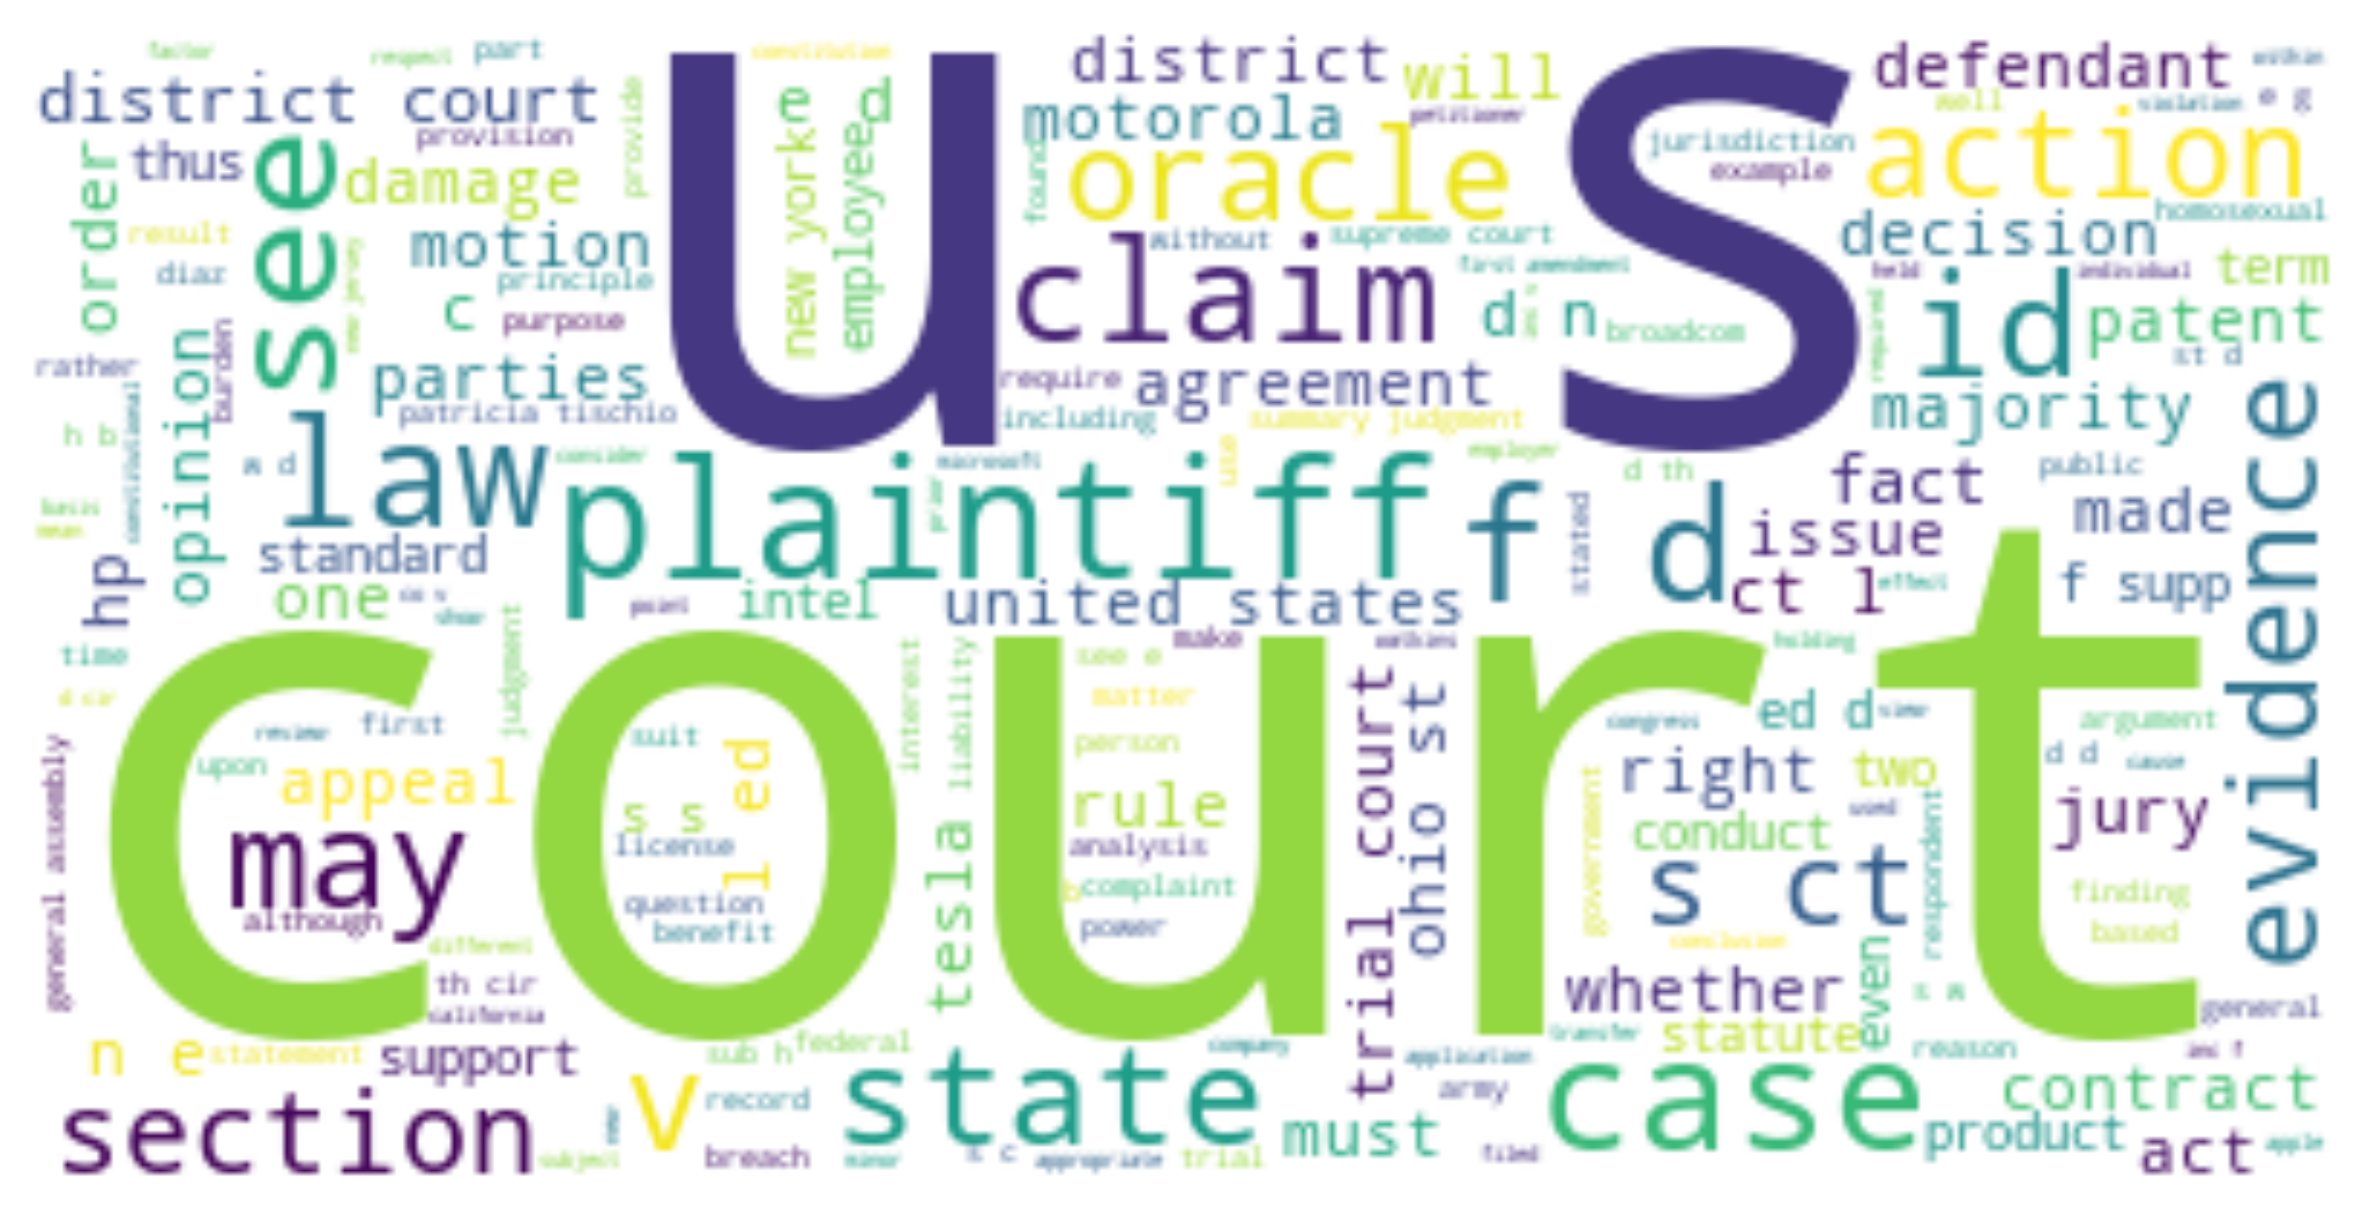

In [9]:
# Let's make a wordcloud to see what words show up the most.

wordcloud = WordCloud(background_color="white").generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()